In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
print(df.info())
#remove unused rows from data frame
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Analyzing data.. And manupilating data depends on our needs..

Benign counts :  (357, 31)
Malignant counts :  (212, 31)


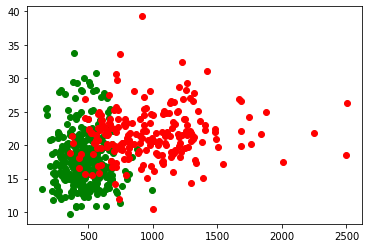

In [5]:
B = df[df.diagnosis=="B"]
M = df[df.diagnosis=="M"]
print("Benign counts : ", B.shape)
print("Malignant counts : ",M.shape)

plt.scatter(B.area_mean ,B.texture_mean,color="green")
plt.scatter(M.area_mean ,M.texture_mean,color="red")
plt.show()

#Update diagnosis results with 1 and 0.Benign = 0 , Malignant= 1
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

y = df.iloc[:,0].values.reshape(-1,1)
X = df.drop("diagnosis",axis=1)

#Normalization..
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

Sigmoid Function.. We are using sigmoid because bounderies of it limited between 0 and 1 and also has derivative.

In [6]:
def sigmoid(z) :
    y_head = 1/(1+np.exp(-z))
    return y_head

Initializing weights and bias for first iteration with random values..This random values are intuitive..

In [7]:
def initWeightsAndBias(size):
    w = np.full((size,1),0.01)
    b = 0.0
    return w, b

Calculation of forward propogation.
With forward propogation lets find z = w.T*x+b.

In [8]:
# z = w.T*x+b
def forwardPropogation (w,b,x_train,y_train,y_head):
    v1 = -y_train*np.log(y_head)
    v2 = (1-y_train)*np.log(1-y_head)
    loss = v1-v2
    cost = (np.sum(loss))/x_train.shape[1]      # divide to size of x_train for scaling
    return cost

Calculation of backward propogation with getting derivative of our function..

In [9]:
def backwardPropogation (x_train,y_train,y_head):
    calculated_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    calculated_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"calculated_weight": calculated_weight,"calculated_bias": calculated_bias}
    return gradients

For training our equation we should execute forward and backward simultaneously..

In [10]:
def forwardBackwardPropagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    cost = forwardPropogation(w,b,x_train,y_train,y_head)
    gradients = backwardPropogation(x_train,y_train,y_head)
    return cost,gradients

Now lets update our weights and bias with the values calculated after forward-backward propogation chain..

In [11]:
def learn(w, b, x_train, y_train, learningRate,iteration):
    costList = []
    
    for i in range(iteration):
        # execute forward backward propogation to get updated gradients and cost
        cost,gradients = forwardBackwardPropagation(w,b,x_train,y_train)
        costList.append(cost)
        # update weight and bias with the calculated values
        w = w - learningRate * gradients["calculated_weight"]
        b = b - learningRate * gradients["calculated_bias"]
        #if (i % 100 == 0) :
        #    print("w : {} - b : {} ".format(w,b) )
        
    # updated weights and bias
    index = np.arange(iteration)
    parameters = {"weight": w,"bias": b}
    #print("Cost lists : " , costList)
    plt.plot(index,costList)
    plt.xticks(index,rotation=90)
    plt.xlabel(" - Iteration Count - ")
    plt.ylabel(" - Cost - ")
    plt.show()
    return parameters, gradients, costList

let make predictions..

In [12]:
def predict(w,b,x_test):
    # make some prediction with test data..
    z = sigmoid(np.dot(w.T,x_test)+b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    # Limit is 0.5. If predicted value is greater than 0.5 
    # then i'll flag the tumor as a malignant otherwise i'll flag it as benign 
    # We can change limit value if its necessary..
    for i in range(z.shape[1]):
        if z[0,i]> 0.5:
            y_prediction[0,i] = 1
        

    return y_prediction

Lets check the accuracy for trained function..

In [13]:
def logisticRegression(x_train, y_train, x_test, y_test, learningRate ,  iteration):
    # initialize
    size =  x_train.shape[0]
    w,b = initWeightsAndBias(size)
    parameters, grad, costList = learn(w, b, x_train, y_train, learningRate,iteration)
    
    y_test_predicted = predict(parameters["weight"],parameters["bias"],x_test)

    # Calculate accuracy with test set..
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_test_predicted - y_test)) * 100))

Creating training and test sets.. And train..

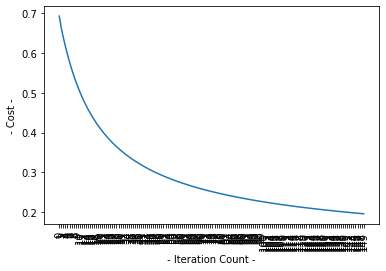

test accuracy: 95.32163742690058 %


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

logisticRegression(x_train, y_train, x_test, y_test,learningRate=1,iteration=150)